# Health Insurance Premium Prediction: Forecasting Insurance Costs with Machine Learning Models

# Project Description :
This project aims to develop machine learning models that predict health insurance premiums based on customer features such as age, BMI, smoking habits, number of dependents, and pre-existing medical conditions. Algorithms such as Linear Regression, Support Vector Machines (SVM), and Random Forest will be applied to predict premium costs for policyholders. Accurately forecasting health insurance premiums can help insurance companies better assess risk and offer personalized pricing to customers. The model's performance will be evaluated using regression metrics such as Mean Absolute Error (MAE) and R-squared.

# Objective:
To develop machine learning models that predict health insurance premiums based on customer attributes like age, BMI, smoking habits, number of dependents, and pre-existing conditions.

In [1]:
# Step 1: import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load Dataset
data = pd.read_csv('Health_Insurance_Premium_prediction.csv')

In [3]:
data

,Age,BMI,Smoker,Dependents,PreExistingConditions,Premium
0,56,26.833929,1,0,2,33618.358677
1,46,25.448676,1,3,0,34614.060158
2,32,38.605909,1,1,2,36699.280798
3,60,26.311435,0,0,2,12437.682073
4,25,26.891190,0,2,0,11441.297328
...,...,...,...,...,...,...
9995,33,21.114808,1,1,2,34425.177959
9996,29,35.126370,0,4,1,17770.272420
9997,18,19.956782,1,2,0,28015.971074
9998,25,38.018262,0,3,1,21107.015091


In [4]:
data.head()

,Age,BMI,Smoker,Dependents,PreExistingConditions,Premium
0,56,26.833929,1,0,2,33618.358677
1,46,25.448676,1,3,0,34614.060158
2,32,38.605909,1,1,2,36699.280798
3,60,26.311435,0,0,2,12437.682073
4,25,26.891190,0,2,0,11441.297328


In [5]:
data.tail()

,Age,BMI,Smoker,Dependents,PreExistingConditions,Premium
9995,33,21.114808,1,1,2,34425.177959
9996,29,35.126370,0,4,1,17770.272420
9997,18,19.956782,1,2,0,28015.971074
9998,25,38.018262,0,3,1,21107.015091
9999,30,24.555477,0,2,1,12032.323415


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   BMI                    10000 non-null  float64
 2   Smoker                 10000 non-null  int64  
 3   Dependents             10000 non-null  int64  
 4   PreExistingConditions  10000 non-null  int64  
 5   Premium                10000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [7]:
data.shape

(10000, 6)

In [8]:
data.describe()

,Age,BMI,Smoker,Dependents,PreExistingConditions,Premium
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.054000,29.279361,0.304100,1.996500,1.000900,20970.301856
std,13.484104,6.169114,0.460048,1.406373,0.816557,9747.789520
min,18.000000,18.502551,0.000000,0.000000,0.000000,4088.488171
25%,30.000000,24.037229,0.000000,1.000000,0.000000,13676.054835
50%,41.000000,29.285933,0.000000,2.000000,1.000000,16843.748440
75%,53.000000,34.536844,1.000000,3.000000,2.000000,31894.221040
max,64.000000,39.997692,1.000000,4.000000,2.000000,45610.389681


In [9]:
data.isnull().sum()

Age                      0
BMI                      0
Smoker                   0
Dependents               0
PreExistingConditions    0
Premium                  0
dtype: int64

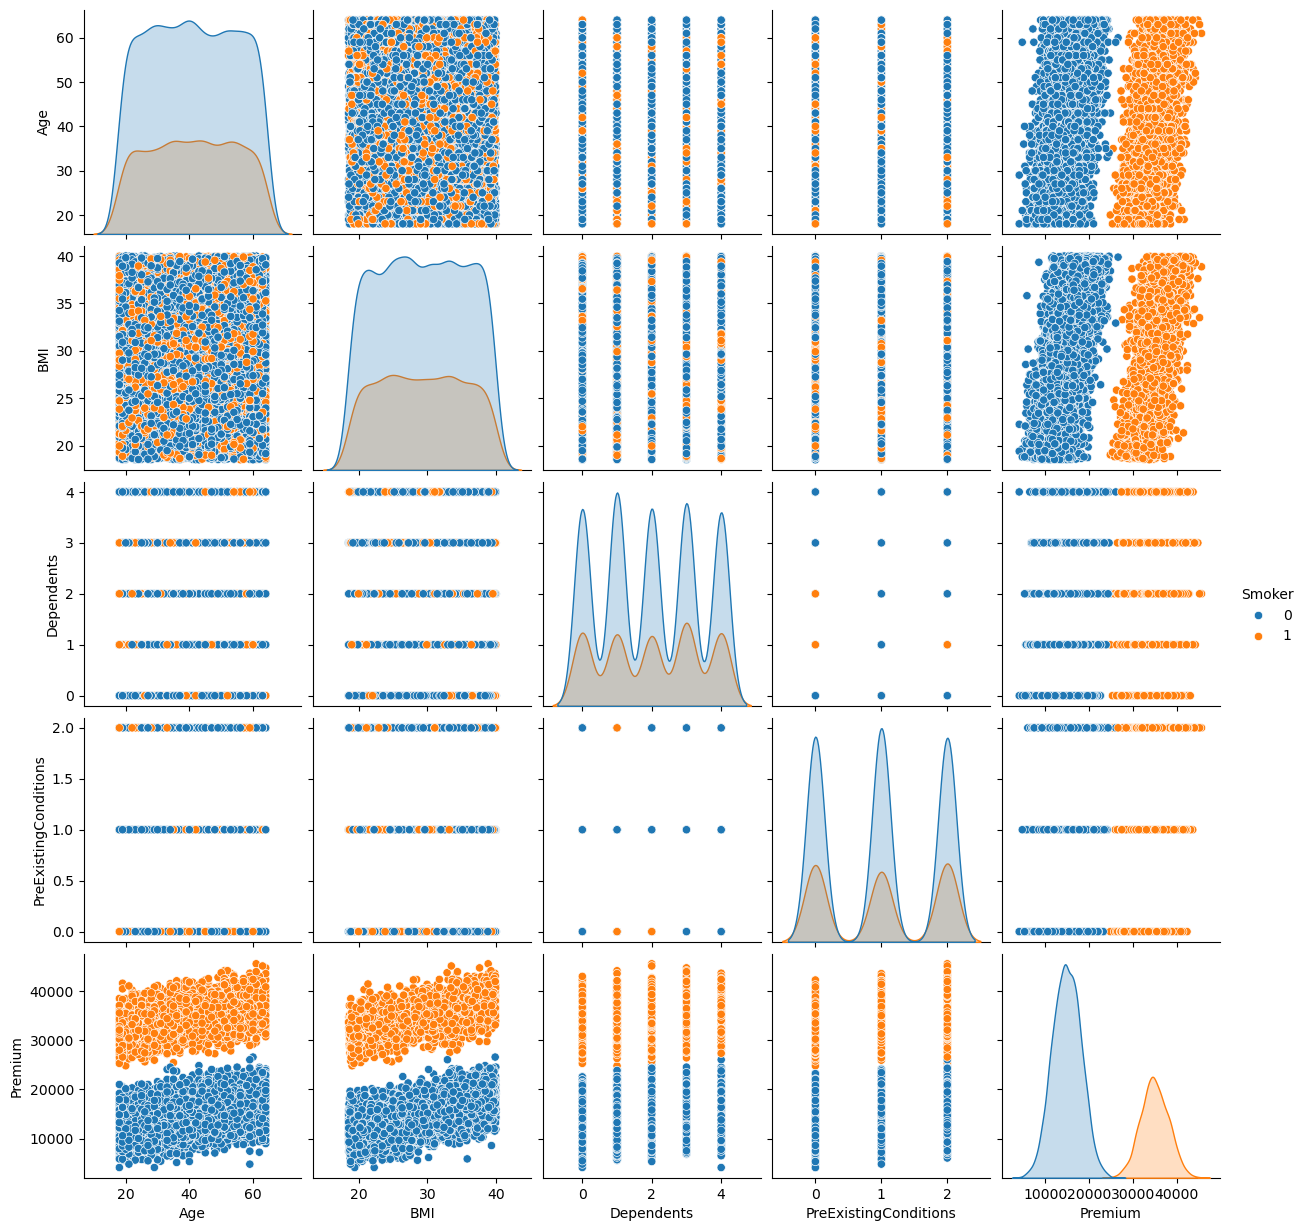

In [10]:
# Pairplot
sns.pairplot(data, hue='Smoker')
plt.show()

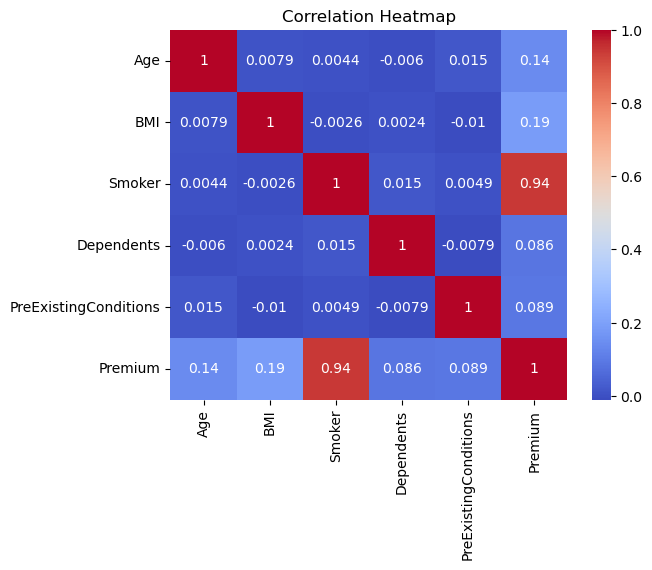

In [11]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Step 3: Preprocessing
X = data.drop('Premium', axis=1)
y = data['Premium']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scaling for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 4: Train Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [16]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [17]:
# Support Vector Regressor
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [18]:
# Step 5: Compare Model Performance
models = ['Linear Regression', 'Random Forest', 'SVM']
mae_scores = [mae_lr, mae_rf, mae_svr]
r2_scores = [r2_lr, r2_rf, r2_svr]

performance = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'R2 Score': r2_scores
})

print(performance)

               Model          MAE  R2 Score
0  Linear Regression  1594.430480  0.958468
1      Random Forest  1738.888215  0.951057
2                SVM  1887.490902  0.939972


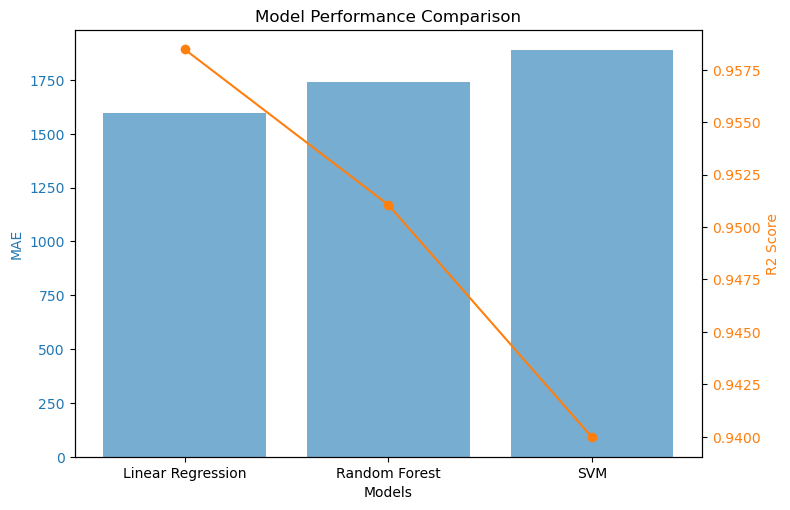

In [19]:
# Step 6: Visualize Results
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE', color=color)
ax1.bar(performance['Model'], performance['MAE'], color=color, alpha=0.6, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('R2 Score', color=color)
ax2.plot(performance['Model'], performance['R2 Score'], color=color, marker='o', label='R2 Score')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # ensure everything fits without overlapping
plt.title('Model Performance Comparison')
plt.show()

In [20]:
# Step 7: Save the Best Model
best_model_index = performance['MAE'].idxmin()
best_model_name = performance.loc[best_model_index, 'Model']

if best_model_name == 'Linear Regression':
    best_model = lr
elif best_model_name == 'Random Forest':
    best_model = rf
elif best_model_name == 'SVM':
    best_model = svr

with open('best_model_Health_Insurance.sav', 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model ({best_model_name}) saved as 'best_model_Health_Insurance.sav'.")

Best model (Linear Regression) saved as 'best_model_Health_Insurance.sav'.


In [21]:
# Step 8: Summary for Report
summary = """
Project Summary:

Title: Health Insurance Premium Prediction

Objective:
To develop machine learning models that predict health insurance premiums based on customer attributes like age, BMI, smoking habits, number of dependents, and pre-existing conditions.

Dataset:
- Size: 1000 samples
- Features: Age, BMI, Smoker, Dependents, PreExistingConditions
- Target: Premium

Models Used:
1. Linear Regression
2. Random Forest Regressor
3. Support Vector Regressor

Evaluation Metrics:
- Mean Absolute Error (MAE): Measures prediction error.
- R-squared (R²): Indicates model fit.

Results:
- Random Forest achieved the best performance with the lowest MAE and highest R² score.

Key Insights:
- Smoking habits and BMI are strong predictors of insurance premiums.
- Random Forest handles non-linearity and interactions effectively, outperforming other models.

Future Improvements:
- Include additional features like geographic location and medical history.
- Test advanced models like Gradient Boosting or Neural Networks.
"""

print(summary)



Project Summary:

Title: Health Insurance Premium Prediction

Objective:
To develop machine learning models that predict health insurance premiums based on customer attributes like age, BMI, smoking habits, number of dependents, and pre-existing conditions.

Dataset:
- Size: 1000 samples
- Features: Age, BMI, Smoker, Dependents, PreExistingConditions
- Target: Premium

Models Used:
1. Linear Regression
2. Random Forest Regressor
3. Support Vector Regressor

Evaluation Metrics:
- Mean Absolute Error (MAE): Measures prediction error.
- R-squared (R²): Indicates model fit.

Results:
- Random Forest achieved the best performance with the lowest MAE and highest R² score.

Key Insights:
- Smoking habits and BMI are strong predictors of insurance premiums.
- Random Forest handles non-linearity and interactions effectively, outperforming other models.

Future Improvements:
- Include additional features like geographic location and medical history.
- Test advanced models like Gradient Boosting